In [4]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import shutil

In [2]:

# Define paths
zip_path = '/content/Grapevine_Leaves_Image_Dataset.zip'
extract_path = '/mnt/data/grapevine_dataset/Grapevine_Leaves_Image_Dataset'

# Create the target directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping complete.")


Unzipping complete.


In [7]:
# Path where extra folder may exist
inner_folder = os.path.join(extract_path, 'Grapevine_Leaves_Image_Dataset')

# Check if extra folder exists and fix it
if os.path.exists(inner_folder):
    for item in os.listdir(inner_folder):
        s = os.path.join(inner_folder, item)  # source
        d = os.path.join(extract_path, item)  # destination

        if os.path.exists(d):
            print(f"Skipping '{item}' because it already exists at destination.")
            continue  # or you could delete and replace if you prefer

        shutil.move(s, d)

#     os.rmdir(inner_folder)  # remove the now empty folder
#     print("Extra folder removed.")
# else:
#     print("No extra folder to remove.")

# ✅ Now extract_path is clean and ready to use!
print("Final dataset path:", extract_path)

Skipping 'Grapevine_Leaves_Image_Dataset' because it already exists at destination.
Final dataset path: /mnt/data/grapevine_dataset/Grapevine_Leaves_Image_Dataset


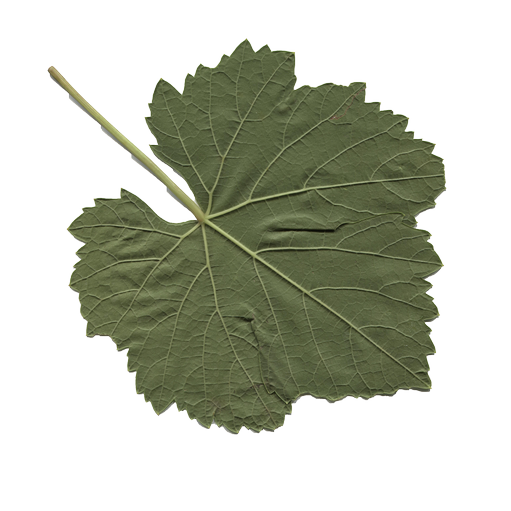

In [22]:
from IPython.display import Image
Image('/content/Buzgulu (25).png')

In [23]:
print("Files/folders inside the extracted path:")
print(os.listdir(extract_path))

Files/folders inside the extracted path:
['__MACOSX', 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt', 'Nazli', 'Dimnit', 'Ak', 'Grapevine_Leaves_Image_Dataset', 'Ala_Idris', 'Buzgulu']


In [24]:
data = []
labels = []

image_size = (100, 100)

In [36]:
for class_name in os.listdir(extract_path):
    class_path = os.path.join(extract_path, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img_flat = img.flatten()
                data.append(img_flat)
                labels.append(class_name)

In [26]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

In [28]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.38

Classification Report:
               precision    recall  f1-score   support

          Ak       0.11      0.30      0.16        10
   Ala_Idris       0.53      0.33      0.41        24
     Buzgulu       0.42      0.42      0.42        24
      Dimnit       0.46      0.43      0.44        14
       Nazli       0.52      0.39      0.45        28

    accuracy                           0.38       100
   macro avg       0.41      0.37      0.38       100
weighted avg       0.45      0.38      0.40       100



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)

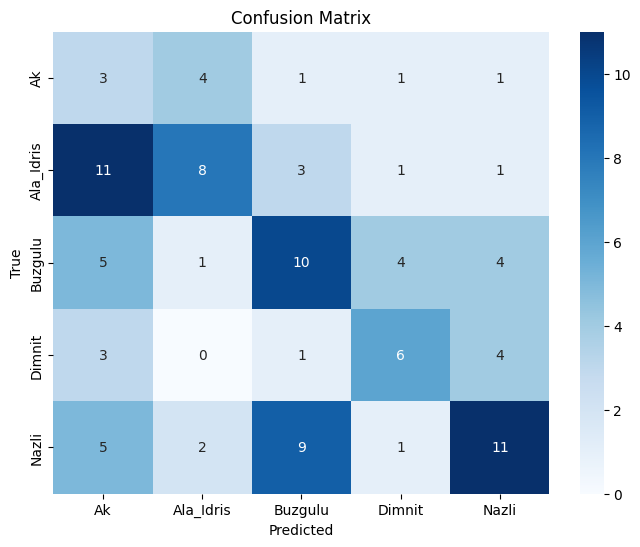

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
import matplotlib.pyplot as plt

def preprocess_and_show_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Image not found or cannot be loaded.")
        return None
    img = cv2.resize(img, (100, 100))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_flat = img_gray.flatten()

    plt.imshow(img_gray, cmap='gray')
    plt.title("Image to Predict")
    plt.axis('off')
    plt.show()

    return img_flat.reshape(1, -1)

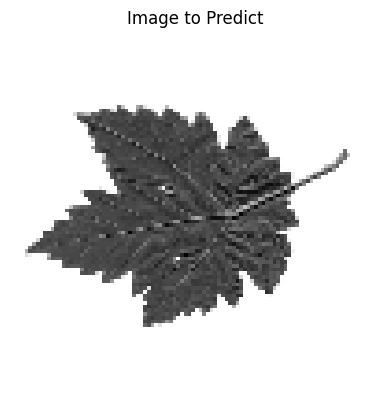

In [39]:
new_img_path = '/content/Ak (23).png'

new_img = preprocess_and_show_image(new_img_path)

if new_img is not None:

    prediction = svm.predict(new_img)

    predicted_class = le.inverse_transform(prediction)[0]



In [40]:
print("Predicted Class:", predicted_class)

Predicted Class: Ak
